### Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/emotion_dataset.pkl", compression='infer')
dataset.head()

Mounted at /content/drive


,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


### Dimension Of the Dataset

In [ ]:
rows, cols = dataset.shape
print(f'Emotion Dataset Contains {rows} rows and {cols} columns')

Emotion Dataset Contains 416809 rows and 2 columns


### Types of the Dataset

In [ ]:
dataset.dtypes

text        object
emotions    object
dtype: object

### Visualize Unique and Duplicates Entities in  Dataset

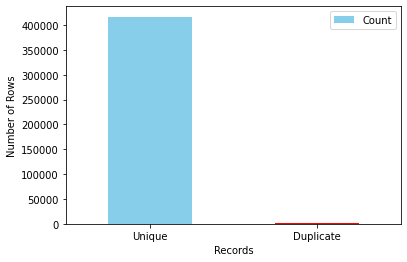

In [ ]:
dup_rows = rows - len(dataset.drop_duplicates(subset=['text', 'emotions']))
dup_vis = pd.DataFrame({'Rows':['Unique', 'Duplicate'], 'Count':[rows, dup_rows]})
dup_vis.plot.bar(x='Rows', y='Count', xlabel='Records', ylabel='Number of Rows', rot=0, color=['skyblue', 'red'])

### Remove Duplicates Entities of the Dataset

In [ ]:
dataset = dataset.drop_duplicates(subset=['text', 'emotions'])
print(f"Duplicate entities of the dataset were {dup_rows}") 
print(f"After dropping duplicate rows the remaining rows x cols of the dataset are {dataset.shape[0]} x {dataset.shape[1]}") 

Duplicate entities of the dataset were 686
After dropping duplicate rows the remaining rows x cols of the dataset are 416123 x 2


### Checking For Null Values in the Dataset

In [ ]:
dataset.isna().any()

text        False
emotions    False
dtype: bool

In [ ]:
print('There are no NULL values in the dataset')

There are no NULL values in the dataset


### Summary of the Dataset

In [ ]:
dataset.describe()

,text,emotions
count,416123,416123
unique,393822,6
top,when,joy
freq,4,140779


### Checking for Sentences with more than 1 emotions

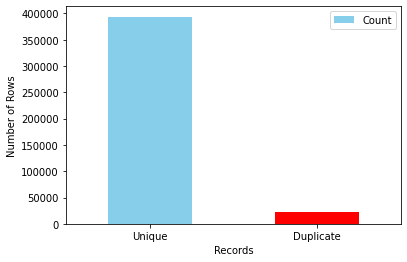

In [ ]:
dup_rows = rows - len(dataset.drop_duplicates(subset=['text']))
dup_vis = pd.DataFrame({'Rows':['Unique', 'Duplicate'], 'Count':[rows-dup_rows, dup_rows]})
dup_vis.plot.bar(x='Rows', y='Count', xlabel='Records', ylabel='Number of Rows', rot=0, color=['skyblue', 'red'])

### removing duplicate sentences with more than 1 emotion

In [ ]:
dataset = dataset.drop_duplicates(subset=['text'])
print(f"Duplicate entities of the dataset were {dup_rows}") 
print(f"After dropping duplicate rows the remaining rows x cols of the dataset are {dataset.shape[0]} x {dataset.shape[1]}") 

Duplicate entities of the dataset were 22987
After dropping duplicate rows the remaining rows x cols of the dataset are 393822 x 2


### Visualizing the Number of Entities against each Emotion

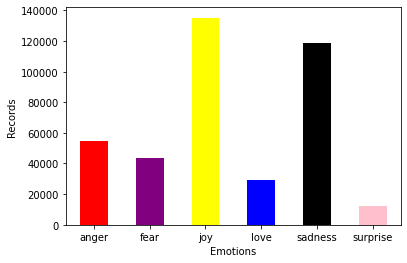

In [ ]:
dataset.groupby(['emotions'])['emotions'].count().plot.bar(xlabel='Emotions', ylabel='Records', rot=0, color=['red', 'purple', 'yellow', 'blue', 'black', 'pink'])

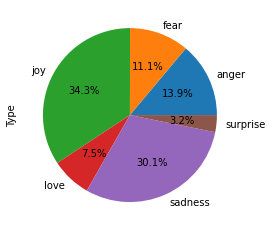

In [ ]:
dataset.groupby('emotions').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

### Cleaning the Dataset

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
# clean the text
def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
# replace the old text with the cleaned text
dataset['text'] = dataset['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset.head()

,text,emotions
27383,feel awful job get position succeed happen,sadness
110083,im alone feel awful,sadness
140764,ive probably mentioned really feel proud actua...,joy
100071,feeling little low days back,sadness
2837,beleive much sensitive peoples feelings tend c...,love


In [ ]:
dataset.tail()

,text,emotions
566,felt finally accepted bulgarian conservatorie ...,joy
36236,take every day comes focussing eating better m...,fear
76229,suddenly feel everything fake,sadness
131640,im feeling eager ever claw back went pear shap...,joy
64703,give plenty attention even feel utterly miserable,sadness


###Dividing the 6 different labels classes in to their individual classes for downsampling

In [ ]:
anger       = dataset[dataset["emotions"] == "anger"]
fear        = dataset[dataset["emotions"] == "fear"]
joy         = dataset[dataset["emotions"] == "joy"]
love        = dataset[dataset["emotions"] == "love"]
sadness     = dataset[dataset["emotions"] == "sadness"]
surprise    = dataset[dataset["emotions"] == "surprise"]

print('Anger:       ',anger.shape)
print('Fear:        ',fear.shape)
print('Joy:         ',joy.shape)
print('Love:        ',love.shape)
print('Sadness:     ',sadness.shape)
print('Surprise:    ',surprise.shape)

Anger:        (54704, 2)
Fear:         (43656, 2)
Joy:          (135104, 2)
Love:         (29394, 2)
Sadness:      (118505, 2)
Surprise:     (12459, 2)


### Downsampling each emotion to "Surprise" length because that is the minimum 

In [ ]:
from sklearn.utils import resample
anger_downsample = resample(anger,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
fear_downsample = resample(fear,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
joy_downsample = resample(joy,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
love_downsample = resample(love,
             replace=True,
             n_samples=len(surprise),
             random_state=42)
sadness_downsample = resample(sadness,
             replace=True,
             n_samples=len(surprise),
             random_state=42)

print('Anger:       ',anger_downsample.shape)
print('Fear:        ',fear_downsample.shape)
print('Joy:         ',joy_downsample.shape)
print('Love:        ',love_downsample.shape)
print('Sadness:     ',sadness_downsample.shape)
print('Surprise:    ',surprise.shape)

Anger:        (12459, 2)
Fear:         (12459, 2)
Joy:          (12459, 2)
Love:         (12459, 2)
Sadness:      (12459, 2)
Surprise:     (12459, 2)


### Merging the indvidual downsampled emotions to make a dataset

anger       12459
fear        12459
joy         12459
love        12459
sadness     12459
surprise    12459
Name: emotions, dtype: int64


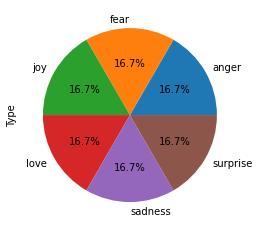

In [ ]:
dataset_downsampled = pd.concat([anger_downsample, fear_downsample, joy_downsample, love_downsample, sadness_downsample, surprise ])

print(dataset_downsampled["emotions"].value_counts())

dataset_downsampled.groupby('emotions').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

### Exporting data set into csv file

In [ ]:
dataset_downsampled.to_csv("/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv")
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv')
df.head(1000)

,Unnamed: 0,text,emotions
0,18146,feel job properly despite fact times got distr...,anger
1,29818,feel resentful somehow feel bad,anger
2,19197,feel irritated see things made think,anger
3,37447,know im still immature ways overall feel petty...,anger
4,3954,feeling bitchy bitter depressed,anger
...,...,...,...
995,13048,enjoyed music still feeling slightly agitated ...,anger
996,41888,replied enjoy lt perhaps better discuss face f...,anger
997,951,student kitchen share,anger
998,48684,going include picture promotion feel mad like ...,anger


###Randomizing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv')
print(df.head(1000))
df = df.sample(frac = 1)
print(df.head(1000))
df.to_csv("/content/drive/My Drive/Colab Notebooks/dataset_emotions_downsampled.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Unnamed: 0                                               text emotions
0         18146  feel job properly despite fact times got distr...    anger
1         29818                    feel resentful somehow feel bad    anger
2         19197               feel irritated see things made think    anger
3         37447  know im still immature ways overall feel petty...    anger
4          3954                    feeling bitchy bitter depressed    anger
..          ...                                                ...      ...
995       13048  enjoyed music still feeling slightly agitated ...    anger
996       41888  replied enjoy lt perhaps better discuss face f...    anger
997         951                              student kitchen share    anger
998       48684  going include picture promotion feel mad like ...    anger
999       25770                    

In [ ]:
import tensorflow
from tensorflow import keras
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = df[['text', 'emotions']]
data.shape
data.emotions.value_counts()

sadness     12459
joy         12459
love        12459
anger       12459
surprise    12459
fear        12459
Name: emotions, dtype: int64

In [ ]:
data.head(1000)

,text,emotions
54565,think getting ahead thigns feel horrible every...,sadness
35206,feel confident motivated work students moderat...,joy
38659,must say good feels many supporting,love
7622,cant lie im definitely feeling envious wonderi...,anger
7427,im making feel heartless hey guess honesty right,anger
...,...,...
30626,feel honored also cant really believe,joy
21645,took away struggle something feel unsure proce...,fear
51553,want live serve cannot feel beaten,sadness
49172,wast tour guide eavesdropped nearby group lear...,love


In [ ]:
def example_complain(index):
  example = data[data.index == index][['text','emotions']].values[0]
  if len(example)>0:
    print(example[0])
    print()
    print('Category:',example[1])

In [ ]:
example_complain(10)

feeling pressure decide forever thanks vicious treadmill young successful current american culture

Category: anger


In [ ]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = str(text)
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data['text'] = data['text'].apply(clean_text)

In [ ]:
example_complain(10)

feel beaten constant aniety frustration looking word constantly disappointed

Category: sadness


In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32049 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (74754, 250)


In [ ]:
X

array([[   0,    0,    0, ...,  493,   99,   27],
       [   0,    0,    0, ..., 7864, 3415, 8919],
       [   0,    0,    0, ...,   34,   63,  303],
       ...,
       [   0,    0,    0, ...,  218,  218, 1659],
       [   0,    0,    0, ...,   35, 1289, 1113],
       [   0,    0,    0, ...,  106,  605, 4095]], dtype=int32)

In [ ]:
Y = pd.get_dummies(data['emotions']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (74754, 6)


In [ ]:
Y

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(59803, 250) (59803, 6)
(14951, 250) (14951, 6)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, activation = 'softmax', dropout = 0.2, recurrent_dropout=0.2))
model.add(Dense(12,activation='softmax', name = 'Hidden_layer1'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 Hidden_layer1 (Dense)       (None, 12)                1212      
                                                                 
 dense (Dense)               (None, 6)                 78        
                                                                 
Total params: 5,081,690
Trainable params: 5,081,690
Non-trainable params: 0
______________________________________________

In [ ]:
epochs = 50
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/50
748/748 [==============================] - 609s 809ms/step - loss: 1.7921 - accuracy: 0.1679 - val_loss: 1.7898 - val_accuracy: 0.2153
Epoch 2/50
748/748 [==============================] - 605s 809ms/step - loss: 1.5056 - accuracy: 0.4386 - val_loss: 1.1804 - val_accuracy: 0.4750
Epoch 3/50
748/748 [==============================] - 607s 812ms/step - loss: 1.0806 - accuracy: 0.4792 - val_loss: 1.0481 - val_accuracy: 0.4755
Epoch 4/50
748/748 [==============================] - 604s 807ms/step - loss: 1.0115 - accuracy: 0.4837 - val_loss: 1.0153 - val_accuracy: 0.4810
Epoch 5/50
748/748 [==============================] - 601s 804ms/step - loss: 0.9749 - accuracy: 0.5036 - val_loss: 0.9918 - val_accuracy: 0.4995
Epoch 6/50
748/748 [==============================] - 598s 800ms/step - loss: 0.8900 - accuracy: 0.6049 - val_loss: 0.8512 - val_accuracy: 0.6264
Epoch 7/50
748/748 [==============================] - 597s 798ms/step - loss: 0.7612 - accuracy: 0.6372 - val_loss: 0.8126 -

In [ ]:
import keras
model.save("/content/drive/My Drive/Colab Notebooks/EMod_5")
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/EMod_5')

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

468/468 [==============================] - 41s 87ms/step - loss: 0.5421 - accuracy: 0.7687
Test set
  Loss: 0.542
  Accuracy: 0.769


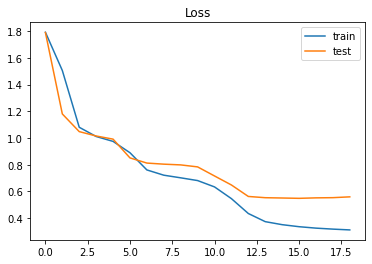

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

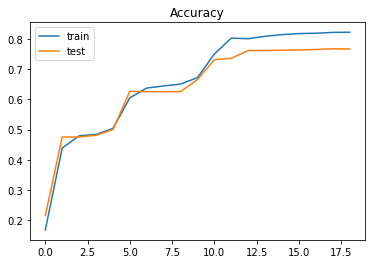

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ['marry me']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['fear', 'joy', 'love', 'sadness', 'surprise', 'anger']

print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 354ms/step
[[0.02601429 0.6400743  0.07815893 0.00630908 0.14685597 0.10258737]] joy


In [ ]:
new_complaint = ['i dont like you']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['fear', 'joy', 'love', 'sadness', 'surprise', 'anger']

print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 49ms/step
[[0.38406608 0.10162675 0.03158677 0.00551556 0.3973531  0.07985177]] surprise


In [ ]:
new_complaint = ['This is a day of sorrow']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['fear', 'joy', 'love', 'sadness', 'surprise', 'anger']

print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 53ms/step
[[0.77392775 0.02788283 0.0076339  0.00246178 0.16235286 0.0257409 ]] fear


In [ ]:
new_complaint = ['Love is real']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['fear', 'joy', 'love', 'sadness', 'surprise', 'anger']

print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 55ms/step
[[0.13459067 0.28744203 0.07234296 0.00764349 0.36304832 0.13493264]] surprise


In [ ]:
new_complaint = ['i am angry']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['fear', 'joy', 'love', 'sadness', 'surprise', 'anger']

print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 58ms/step
[[9.8959231e-01 1.3457221e-03 1.3949339e-04 1.9964516e-04 7.9558752e-03
  7.6702790e-04]] fear


In [ ]:
new_complaint = ['I dont like to study']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['fear', 'joy', 'love', 'sadness', 'surprise', 'anger']

print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 52ms/step
[[0.04640816 0.62201506 0.05035886 0.0075852  0.20244792 0.07118483]] joy


In [ ]:
new_complaint = ['I am scared of all this']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['fear', 'joy', 'love', 'sadness', 'surprise', 'anger']

print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 52ms/step
[[1.5571882e-03 9.8569494e-01 3.8139690e-03 9.5510081e-04 4.4669663e-03
  3.5119900e-03]] joy


In [ ]:
new_complaint = ['kill the mosquitos in the room']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['fear', 'joy', 'love', 'sadness', 'surprise', 'anger']

print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 62ms/step
[[5.7559297e-04 9.4158845e-03 4.3799207e-01 4.5010721e-04 1.7627176e-02
  5.3393912e-01]] anger
